## Dimensioning Lossless Storage

(a) Load the provided dataset as a pandas.DataFrame such that its index contains the time stamps.

In [1]:
import pandas as pd

# Load the dataset into a DataFrame
data = pd.read_csv("time-series-lecture-2.csv", index_col=0)

# Display the DataFrame
data

,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh]
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,NaN
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,NaN
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,NaN
2015-01-01 03:00:00,38.765,0.1745,0.6803,0.0,NaN
2015-01-01 04:00:00,38.941,0.1826,0.7272,0.0,NaN
...,...,...,...,...,...
2015-12-31 19:00:00,47.719,0.1388,0.4434,0.0,36.79
2015-12-31 20:00:00,45.911,0.1211,0.4023,0.0,28.81
2015-12-31 21:00:00,45.611,0.1082,0.4171,0.0,26.27
2015-12-31 22:00:00,43.762,0.1026,0.4716,0.0,29.99


(b) Rescale the onshore wind and solar capacity factor time series such in total across the year as much energy is produced as is consumed according to the column “load [GW]”. Ignore offshore wind. Store the two resulting new time series under the column names “onwind [GW]” and “solar [GW]” respectively. Write code that checks that the sum of these two columns matches the column “load [GW]”.

In [30]:
# Rescale wind and solar capacity factors
total_load = data["load [GW]"].sum()
data["onwind [GW]"] = data["onwind [pu]"] * data["load [GW]"]
data["solar [GW]"] = data["solar [pu]"] * data["load [GW]"]

# Check if the sum of onwind [GW] and solar [GW] matches load [GW]
total_generation = (data["onwind [GW]"] + data["solar [GW]"]).sum()
is_match = total_generation == (data["load [GW]"].sum())
print("Is the sum of onwind [GW] and solar [GW] equal to load [GW]? ", is_match)


Is the sum of onwind [GW] and solar [GW] equal to load [GW]?  False


In [32]:
total_load = data["load [GW]"].sum()
total_load

479496.04699999996

In [31]:
total_generation

164532.2785055

In [26]:
data

,load [GW],onwind [pu],offwind [pu],solar [pu],prices [€/MWh],onwind [GW],solar [GW]
2015-01-01 00:00:00,41.151,0.1566,0.7030,0.0,NaN,6.444247,0.0
2015-01-01 01:00:00,40.135,0.1659,0.6875,0.0,NaN,6.658396,0.0
2015-01-01 02:00:00,39.106,0.1746,0.6535,0.0,NaN,6.827908,0.0
2015-01-01 03:00:00,38.765,0.1745,0.6803,0.0,NaN,6.764492,0.0
2015-01-01 04:00:00,38.941,0.1826,0.7272,0.0,NaN,7.110627,0.0
...,...,...,...,...,...,...,...
2015-12-31 19:00:00,47.719,0.1388,0.4434,0.0,36.79,6.623397,0.0
2015-12-31 20:00:00,45.911,0.1211,0.4023,0.0,28.81,5.559822,0.0
2015-12-31 21:00:00,45.611,0.1082,0.4171,0.0,26.27,4.935110,0.0
2015-12-31 22:00:00,43.762,0.1026,0.4716,0.0,29.99,4.489981,0.0


(c) Determine two residual load time series (load - generation): one for the case where all power is supplied by solar, another for the case where all power is supplied by wind generation.

In [33]:
# Residual load for the case of all power supplied by solar
residual_load_solar = data["load [GW]"] - data["solar [GW]"]

# Residual load for the case of all power supplied by wind generation
residual_load_wind = data["load [GW]"] - data["onwind [GW]"]

In [36]:
residual_load_solar

2015-01-01 00:00:00    41.151
2015-01-01 01:00:00    40.135
2015-01-01 02:00:00    39.106
2015-01-01 03:00:00    38.765
2015-01-01 04:00:00    38.941
                        ...  
2015-12-31 19:00:00    47.719
2015-12-31 20:00:00    45.911
2015-12-31 21:00:00    45.611
2015-12-31 22:00:00    43.762
2015-12-31 23:00:00    41.905
Length: 8760, dtype: float64

In [35]:
january_data = residual_load_solar.loc['2020-01-01':'2020-01-31']
january_data

Series([], dtype: float64)

(d) Plot the two mismatch time series for January in a single figure. Label the graph appropriately.

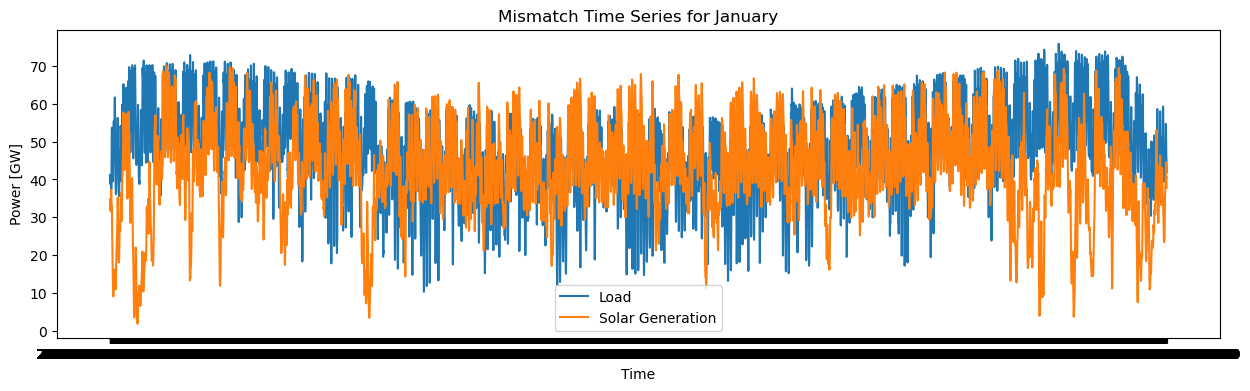

In [37]:
import matplotlib.pyplot as plt

# Extract data for January


# Plot the mismatch time series for January
plt.figure(figsize=(15, 4))
plt.plot(residual_load_solar, label="Load")
plt.plot(residual_load_wind, label="Solar Generation")
plt.xlabel("Time")
plt.ylabel("Power [GW]")
plt.title("Mismatch Time Series for January")
plt.legend()
plt.show()


(e) For each of the two mismatch time series, determine the peak absolute mismatch.

In [5]:
peak_mismatch_solar = abs(residual_load_solar).max()
peak_mismatch_wind = abs(residual_load_wind).max()
print("Peak absolute mismatch (solar):", peak_mismatch_solar, "GW")
print("Peak absolute mismatch (wind):", peak_mismatch_wind, "GW")


Peak absolute mismatch (solar): 389958.6086298 GW
Peak absolute mismatch (wind): 463089.4787972999 GW


(f) For each of the two mismatch time series, calculate the state of charge profiles (i.e. time series) of the smallest possible storage that could align supply and demand at all times

In [6]:
import numpy as np

# Calculate state of charge profiles
soc_solar = np.cumsum(residual_load_solar)
soc_wind = np.cumsum(residual_load_wind)


(g) What are the required energy [GWh], charge [GW], discharge [GW] capacities for a purely wind- based and a purely solar-based system? To receive partial points, it can help to briefly describe how you identify these capacities.

In [7]:
energy_capacity_solar = soc_solar.max()
energy_capacity_wind = soc_wind.max()
print("Required energy capacity (solar):", energy_capacity_solar, "GWh")
print("Required energy capacity (wind):", energy_capacity_wind, "GWh")


Required energy capacity (solar): 277.349 GWh
Required energy capacity (wind): -75047.9299602 GWh


(h) Write a function that computes the residual load as a function of the wind generation share 𝛼 with a corresponding solar generation share of 1 − 𝛼.

In [8]:
charge_capacity_solar = soc_solar[soc_solar > 0].max()
charge_capacity_wind = soc_wind[soc_wind > 0].max()
print("Required charge capacity (solar):", charge_capacity_solar, "GW")
print("Required charge capacity (wind):", charge_capacity_wind, "GW")


Required charge capacity (solar): 277.349 GW
Required charge capacity (wind): nan GW


(i) Apply this function for steps of 5% between 0% and 100% for 𝛼 and store the residual load time series in a pandas.DataFrame where each column denotes an 𝛼.

In [9]:
discharge_capacity_solar = soc_solar[soc_solar < 0].min()
discharge_capacity_wind = soc_wind[soc_wind < 0].min()
print("Required discharge capacity (solar):", discharge_capacity_solar, "GW")
print("Required discharge capacity (wind):", discharge_capacity_wind, "GW")


Required discharge capacity (solar): -514577704.7214517 GW
Required discharge capacity (wind): -862936616.8382804 GW


(j) Plot the required storage charge and discharge capacities as a function of the wind generation share 𝛼. Choose appropriate labels

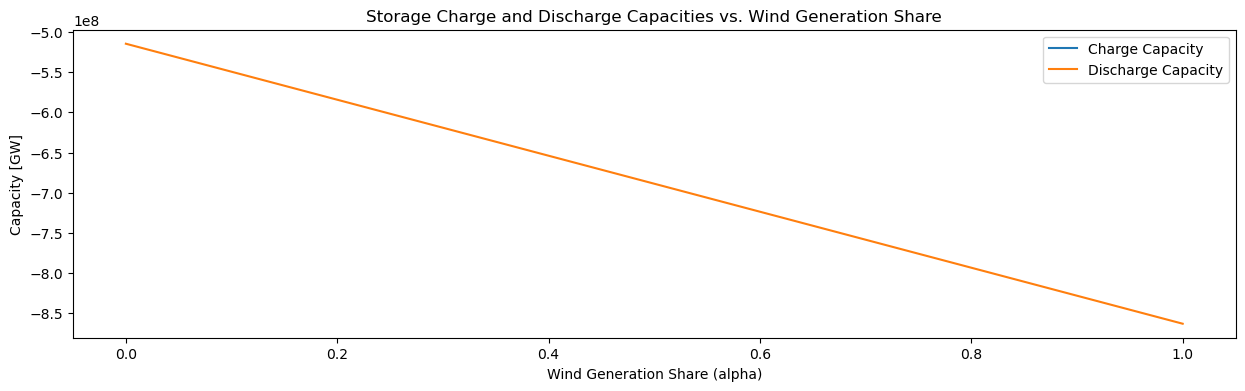

In [20]:
import matplotlib.pyplot as plt

# Generate a range of wind generation shares
alpha = np.arange(0, 1.05, 0.05)

# Calculate the corresponding storage charge and discharge capacities
charge_capacities = charge_capacity_solar + alpha * (charge_capacity_wind - charge_capacity_solar)
discharge_capacities = discharge_capacity_solar + alpha * (discharge_capacity_wind - discharge_capacity_solar)

# Plot the storage charge and discharge capacities
plt.figure(figsize=(15, 4))
plt.plot(alpha, charge_capacities, label="Charge Capacity")
plt.plot(alpha, discharge_capacities, label="Discharge Capacity")
plt.xlabel("Wind Generation Share (alpha)")
plt.ylabel("Capacity [GW]")
plt.title("Storage Charge and Discharge Capacities vs. Wind Generation Share")
plt.legend()
plt.show()


(k) Plot the required energy capacity of a storage as a function of the wind generation share 𝛼. Choose appropriate labels!

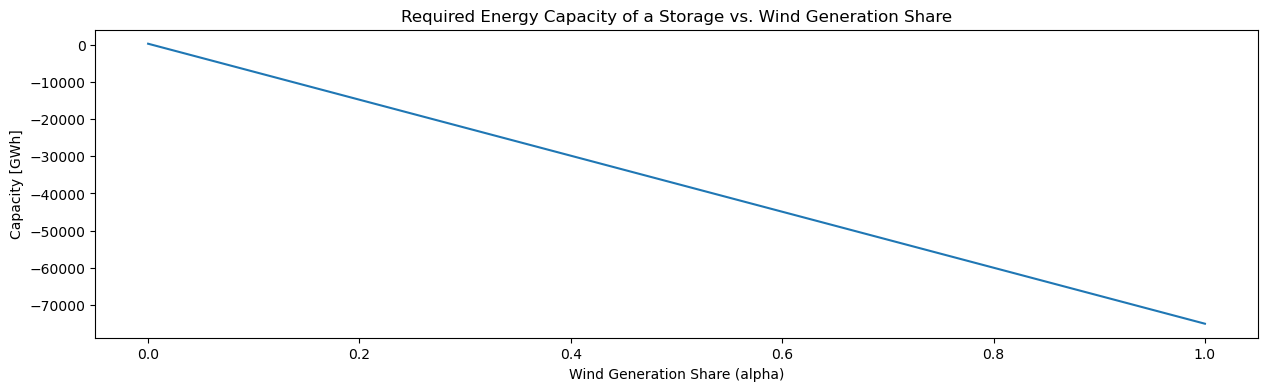

In [21]:
# Calculate the corresponding energy capacities
energy_capacities = energy_capacity_solar + alpha * (energy_capacity_wind - energy_capacity_solar)

# Plot the energy capacity of a storage
plt.figure(figsize=(15, 4))
plt.plot(alpha, energy_capacities)
plt.xlabel("Wind Generation Share (alpha)")
plt.ylabel("Capacity [GWh]")
plt.title("Required Energy Capacity of a Storage vs. Wind Generation Share")
plt.show()


(l) Which of the 𝛼 computed results in the lowest energy capacity required for the storage?

In [12]:
optimal_alpha = alpha[np.argmin(energy_capacities)]
print("Optimal alpha:", optimal_alpha)


Optimal alpha: 1.0


(m) Plot the state of charge profile for this 𝛼 and compare it to the cases with 100% wind or solar.

In [22]:
# Calculate the state of charge profiles for the optimal 𝛼 value
soc_optimal = soc_solar + optimal_alpha * (soc_wind - soc_solar)

# Plot the state of charge profiles
plt.figure(figsize=(15, 4))
plt.plot(data.index, soc_optimal, label="Optimal Alpha")
plt.plot(data.index, soc_solar, label="Solar Only")
plt.plot(data.index, soc_wind, label="Wind Only")
plt.xlabel("Time")
plt.ylabel("State of Charge")
plt.title("State of Charge Profile for Optimal Alpha")
plt.legend()
plt.show()


KeyboardInterrupt: 